In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from http import HTTPStatus

In [20]:
df_reservoirs = pd.read_csv("data/raw/reservoir_sensors_reads.csv")
df_reservoirs = df_reservoirs.rename(columns={df_reservoirs.columns[0]: "timestamp"})
df_reservoirs["timestamp"] = pd.to_datetime(df_reservoirs["timestamp"], format="%Y-%m-%d %H:%M:%S")
df_reservoirs = df_reservoirs.sort_values(by="timestamp").reset_index(drop=True)
df_reservoirs["date"] = df_reservoirs["timestamp"].dt.date
df_reservoirs["year_month"] = df_reservoirs["timestamp"].dt.to_period("M")
df_reservoirs.head()

,timestamp,080581-002-ANA006,081419-003-ANA005,082687-001-ANA015,083036-001-ANA023,170600-001-ANA021,171899-003-ANA007,250753-004-ANA010,430430-001-ANA002,430496-001-ANA001,...,CALC000722,CALC000735,CALC000698,CALC000697,CALC000699,171169-001-ANA009,CALC000168,CALC000158,date,year_month
0,2023-01-12 00:00:00,98.6800,775.3222,598.46,390.5812,142.5300,187.8862,518.41,80.1042,458.79,...,27.427,45.636,21.8402,30.843,11.126,318.7136,39.5792,92.3778,2023-01-12,2023-01
1,2023-01-12 06:00:00,98.6800,775.3200,598.45,390.5762,142.5300,188.1482,518.40,80.1020,458.78,...,27.424,45.599,21.8380,30.828,11.117,318.6550,39.5056,92.2060,2023-01-12,2023-01
2,2023-01-12 12:00:00,98.6800,775.3200,598.45,390.5758,142.5188,188.1272,518.40,80.0992,458.78,...,27.424,45.599,21.8380,30.828,11.117,318.6282,39.4718,92.1270,2023-01-12,2023-01
3,2023-01-12 18:00:00,98.6800,775.3200,598.44,390.5724,142.5100,188.3044,518.40,80.0990,458.78,...,27.424,45.599,21.8380,30.814,11.117,318.5740,39.4036,91.9678,2023-01-12,2023-01
4,2023-01-13 00:00:00,98.6852,775.3200,598.44,390.5734,142.5100,187.9898,518.39,80.0988,458.78,...,27.424,45.562,21.8380,30.814,11.108,318.5720,39.4010,91.9620,2023-01-13,2023-01


In [21]:
df_reservoirs.tail()

,timestamp,080581-002-ANA006,081419-003-ANA005,082687-001-ANA015,083036-001-ANA023,170600-001-ANA021,171899-003-ANA007,250753-004-ANA010,430430-001-ANA002,430496-001-ANA001,...,CALC000722,CALC000735,CALC000698,CALC000697,CALC000699,171169-001-ANA009,CALC000168,CALC000158,date,year_month
3235,2025-04-07 18:00:00,100.5106,791.789,629.36,416.5210,151.91,188.2210,526.0200,82.8956,467.83,...,56.992,78.2240,45.383,107.113,19.0710,322.1336,44.0646,102.8462,2025-04-07,2025-04
3236,2025-04-08 00:00:00,100.5128,791.829,629.36,416.4468,151.91,188.0796,526.0300,82.9042,467.84,...,57.087,78.2730,45.458,107.113,19.0830,322.3430,44.3504,103.5142,2025-04-08,2025-04
3237,2025-04-08 06:00:00,100.4816,791.870,629.35,416.4332,151.92,188.1910,526.0428,82.9036,467.85,...,57.184,78.3362,45.536,107.077,19.0984,322.4546,44.5030,103.8700,2025-04-08,2025-04
3238,2025-04-08 12:00:00,100.4800,791.921,629.33,416.4698,151.92,188.0610,526.0580,82.9128,467.86,...,57.305,78.4144,45.632,107.005,19.1174,322.4796,44.5372,103.9498,2025-04-08,2025-04
3239,2025-04-08 18:00:00,100.4900,791.961,629.33,416.4088,151.92,188.3010,526.0600,82.9200,467.86,...,57.400,78.4250,45.708,107.005,19.1200,322.6298,44.7428,104.4292,2025-04-08,2025-04


In [22]:
df_reservoirs_metadata = pd.read_csv("data/raw/metadata/reservoir_sensors_metadata.csv")
df_reservoirs_metadata.head()

,sensor_id,description,dataType,location,type,unit,timeZone,publicAccess,component,componentType,...,info_river_district,info_basin,info_sub_basin,info_municipality,info_reservoir_max_capacity_(hm3),info_x_coord_utm_etrs89,info_y_coord_utm_etrs89,info_drained_basin_surface(km2),info_responsible_entity,info_state
0,080581-002-ANA006,Absolute level,NUMBER,41.255617318 1.651034658,20,masl,CET,True,080581-002,reservoir,...,ACA,EL FOIX,EL FOIX,CASTELLET I LA GORNAL,3.74,386988,4568011,293.32,AGÈNCIA CATALANA DE L'AIGUA,In service
1,081419-003-ANA005,Absolute level,NUMBER,42.099784969 1.58285827,20,masl,CET,True,081419-003,reservoir,...,ACA,EL LLOBREGAT,EL CARDENER,NAVÈS,80.00,382818,4661827,197.00,AGÈNCIA CATALANA DE L'AIGUA,In service
2,082687-001-ANA015,Absolute level,NUMBER,42.122014524 1.878559556,20,masl,CET,True,082687-001,reservoir,...,ACA,EL LLOBREGAT,ALT LLOBREGAT,CERCS,109.43,407302,4663932,503.35,AGÈNCIA CATALANA DE L'AIGUA,In service
3,083036-001-ANA023,Absolute level,NUMBER,41.968624956 2.413554059,20,masl,CET,True,083036-001,reservoir,...,ACA,EL TER,ALT TER,VILANOVA DE SAU,165.26,451408,4646459,1564.00,AGÈNCIA CATALANA DE L'AIGUA,In service
4,170600-001-ANA021,Absolute level,NUMBER,42.340588782 2.833225165,20,masl,CET,True,170600-001,reservoir,...,ACA,LA MUGA,LA MUGA,DARNIUS,61.10,486262,4687606,181.20,AGÈNCIA CATALANA DE L'AIGUA,In service


In [23]:
df_reservoirs_metadata.groupby("description").count()

,sensor_id,dataType,location,type,unit,timeZone,publicAccess,component,componentType,componentDesc,...,info_river_district,info_basin,info_sub_basin,info_municipality,info_reservoir_max_capacity_(hm3),info_x_coord_utm_etrs89,info_y_coord_utm_etrs89,info_drained_basin_surface(km2),info_responsible_entity,info_state
description,,,,,,,,,,,,,,,,,,,,,
Absolute level,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Percentage reservoir volume,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Reservoir volume,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [24]:
df_reservoirs_metadata.groupby("component").count()

,sensor_id,description,dataType,location,type,unit,timeZone,publicAccess,componentType,componentDesc,...,info_river_district,info_basin,info_sub_basin,info_municipality,info_reservoir_max_capacity_(hm3),info_x_coord_utm_etrs89,info_y_coord_utm_etrs89,info_drained_basin_surface(km2),info_responsible_entity,info_state
component,,,,,,,,,,,,,,,,,,,,,
080581-002,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
081419-003,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
082687-001,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
083036-001,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
170600-001,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
171169-001,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
171899-003,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
250753-004,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
430430-001,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [25]:
df_reservoirs_metadata = df_reservoirs_metadata[df_reservoirs_metadata["description"] == "Percentage reservoir volume"].reset_index(drop=True)
df_reservoirs_metadata.to_csv("data/simplified/reservoir_sensors_metadata.csv", index=False)
df_reservoirs_metadata

,sensor_id,description,dataType,location,type,unit,timeZone,publicAccess,component,componentType,...,info_river_district,info_basin,info_sub_basin,info_municipality,info_reservoir_max_capacity_(hm3),info_x_coord_utm_etrs89,info_y_coord_utm_etrs89,info_drained_basin_surface(km2),info_responsible_entity,info_state
0,CALC000041,Percentage reservoir volume,NUMBER,41.255617318 1.651034658,39,%,CET,True,080581-002,reservoir,...,ACA,EL FOIX,EL FOIX,CASTELLET I LA GORNAL,3.74,386988,4568011,293.32,AGÈNCIA CATALANA DE L'AIGUA,In service
1,CALC000046,Percentage reservoir volume,NUMBER,42.340588782 2.833225165,39,%,CET,True,170600-001,reservoir,...,ACA,LA MUGA,LA MUGA,DARNIUS,61.10,486262,4687606,181.20,AGÈNCIA CATALANA DE L'AIGUA,In service
2,CALC000103,Percentage reservoir volume,NUMBER,41.195224935 1.327889195,39,%,CET,True,430430-001,reservoir,...,ACA,EL GAIÀ,EL GAIÀ,"CATLLAR, EL",59.40,359786,4561777,358.45,"REPSOL PETRÓLEO, SA",In service
3,CALC000120,Percentage reservoir volume,NUMBER,41.134931354 0.960270444,39,%,CET,True,430537-001,reservoir,...,ACA,RIERA DE RIUDECANYES,RIERA DE RIUDECANYES,RIUDECANYES,5.32,328801,4555741,31.00,COMUNITAT DE REGANTS DEL PANTÀ DE RIUDECANYES,In service
4,CALC000125,Percentage reservoir volume,NUMBER,41.249642381 0.913800784,39,%,CET,True,430496-001,reservoir,...,ACA,L'EBRE,RIU DE SIURANA,CORNUDELLA DE MONTSANT,12.22,325206,4568569,60.40,AGÈNCIA CATALANA DE L'AIGUA,In service
5,CALC000143,Percentage reservoir volume,NUMBER,41.984436008 2.601414188,39,%,CET,True,171899-003,reservoir,...,ACA,EL TER,ALT TER,"CELLERA DE TER, LA",1.30,466982,4648125,1799.00,"ENDESA GENERACION, SA",In service
6,CALC000152,Percentage reservoir volume,NUMBER,41.968624956 2.413554059,39,%,CET,True,083036-001,reservoir,...,ACA,EL TER,ALT TER,VILANOVA DE SAU,165.26,451408,4646459,1564.00,AGÈNCIA CATALANA DE L'AIGUA,In service
7,CALC000713,Percentage reservoir volume,NUMBER,42.122014524 1.878559556,39,%,CET,True,082687-001,reservoir,...,ACA,EL LLOBREGAT,ALT LLOBREGAT,CERCS,109.43,407302,4663932,503.35,AGÈNCIA CATALANA DE L'AIGUA,In service
8,CALC000722,Percentage reservoir volume,NUMBER,42.099784969 1.58285827,39,%,CET,True,081419-003,reservoir,...,ACA,EL LLOBREGAT,EL CARDENER,NAVÈS,80.00,382818,4661827,197.00,AGÈNCIA CATALANA DE L'AIGUA,In service
9,CALC000735,Percentage reservoir volume,NUMBER,41.962942293 1.605613258,39,%,CET,True,250753-004,reservoir,...,ACA,EL LLOBREGAT,EL CARDENER,CLARIANA DE CARDENER,24.38,384452,4646602,304.99,AGÈNCIA CATALANA DE L'AIGUA,In service


## Enriquim les dades amb la conca del riu

In [26]:
df_reservoirs_metadata[["info_river", "info_basin", "info_sub_basin"]]

,info_river,info_basin,info_sub_basin
0,RIU FOIX,EL FOIX,EL FOIX
1,RIU MUGA,LA MUGA,LA MUGA
2,RIU GAIÀ,EL GAIÀ,EL GAIÀ
3,RIERA DE RIUDECANYES,RIERA DE RIUDECANYES,RIERA DE RIUDECANYES
4,E. SIURANA,L'EBRE,RIU DE SIURANA
5,RIU TER,EL TER,ALT TER
6,RIU TER,EL TER,ALT TER
7,RIU LLOBREGAT,EL LLOBREGAT,ALT LLOBREGAT
8,RIU CARDENER,EL LLOBREGAT,EL CARDENER
9,RIU CARDENER,EL LLOBREGAT,EL CARDENER


In [27]:
def get_river_catalan_basin(river) -> str:
    if river == "E. SIURANA":
        return "Ebre"
    return "Conques Internes"

df_reservoirs_metadata["conca"] = df_reservoirs_metadata["info_river"].apply(get_river_catalan_basin)
df_reservoirs_metadata["conca"].value_counts()

conca
Conques Internes    10
Ebre                 1
Name: count, dtype: int64

## Enriquim les dades amb l'alçada respece el nivell del mar

In [28]:
for row_idx in range(len(df_reservoirs_metadata)):
    location = df_reservoirs_metadata.loc[row_idx, "location"]
    latitude, longitude = location.split(" ")
    df_reservoirs_metadata.loc[row_idx, "latitude"] = latitude
    df_reservoirs_metadata.loc[row_idx, "longitude"] = longitude

#df_reservoirs_metadata = df_reservoirs_metadata.drop(columns=["location"])
df_reservoirs_metadata.head()

,sensor_id,description,dataType,location,type,unit,timeZone,publicAccess,component,componentType,...,info_municipality,info_reservoir_max_capacity_(hm3),info_x_coord_utm_etrs89,info_y_coord_utm_etrs89,info_drained_basin_surface(km2),info_responsible_entity,info_state,conca,latitude,longitude
0,CALC000041,Percentage reservoir volume,NUMBER,41.255617318 1.651034658,39,%,CET,True,080581-002,reservoir,...,CASTELLET I LA GORNAL,3.74,386988,4568011,293.32,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,41.255617318,1.651034658
1,CALC000046,Percentage reservoir volume,NUMBER,42.340588782 2.833225165,39,%,CET,True,170600-001,reservoir,...,DARNIUS,61.10,486262,4687606,181.20,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,42.340588782,2.833225165
2,CALC000103,Percentage reservoir volume,NUMBER,41.195224935 1.327889195,39,%,CET,True,430430-001,reservoir,...,"CATLLAR, EL",59.40,359786,4561777,358.45,"REPSOL PETRÓLEO, SA",In service,Conques Internes,41.195224935,1.327889195
3,CALC000120,Percentage reservoir volume,NUMBER,41.134931354 0.960270444,39,%,CET,True,430537-001,reservoir,...,RIUDECANYES,5.32,328801,4555741,31.00,COMUNITAT DE REGANTS DEL PANTÀ DE RIUDECANYES,In service,Conques Internes,41.134931354,0.960270444
4,CALC000125,Percentage reservoir volume,NUMBER,41.249642381 0.913800784,39,%,CET,True,430496-001,reservoir,...,CORNUDELLA DE MONTSANT,12.22,325206,4568569,60.40,AGÈNCIA CATALANA DE L'AIGUA,In service,Ebre,41.249642381,0.913800784


In [29]:
sensor_ids_to_keep = df_reservoirs_metadata["sensor_id"].values.tolist()
columns_to_keep = [*["timestamp", "date", "year_month"], *sensor_ids_to_keep]
columns_to_keep

['timestamp',
 'date',
 'year_month',
 'CALC000041',
 'CALC000046',
 'CALC000103',
 'CALC000120',
 'CALC000125',
 'CALC000143',
 'CALC000152',
 'CALC000713',
 'CALC000722',
 'CALC000735',
 'CALC000168']

In [30]:
df_reservoirs = df_reservoirs.loc[:, df_reservoirs.columns.isin(columns_to_keep)]
df_reservoirs.to_csv("data/simplified/reservoir_sensors_reads.csv", index=False)
df_reservoirs

,timestamp,CALC000041,CALC000046,CALC000103,CALC000120,CALC000125,CALC000143,CALC000152,CALC000713,CALC000722,CALC000735,CALC000168,date,year_month
0,2023-01-12 00:00:00,71.7056,31.4010,1.7600,12.857,7.807,74.1094,19.1476,28.185,27.427,45.6360,39.5792,2023-01-12,2023-01
1,2023-01-12 06:00:00,71.7272,31.4010,1.7580,12.820,7.791,80.3126,19.1406,28.171,27.424,45.5990,39.5056,2023-01-12,2023-01
2,2023-01-12 12:00:00,71.6736,31.3716,1.7580,12.801,7.791,79.7970,19.1404,28.171,27.424,45.5990,39.4718,2023-01-12,2023-01
3,2023-01-12 18:00:00,71.7110,31.3470,1.7580,12.782,7.791,84.0780,19.1358,28.159,27.424,45.5990,39.4036,2023-01-12,2023-01
4,2023-01-13 00:00:00,71.7326,31.3470,1.7580,12.763,7.791,76.5470,19.1370,28.159,27.424,45.5620,39.4010,2023-01-13,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2025-04-07 18:00:00,100.4550,65.0230,2.0000,54.605,24.452,82.0310,73.3920,97.883,56.992,78.2240,44.0646,2025-04-07,2025-04
3236,2025-04-08 00:00:00,100.3740,65.0230,2.0020,54.662,24.476,78.6408,73.1722,97.883,57.087,78.2730,44.3504,2025-04-08,2025-04
3237,2025-04-08 06:00:00,100.0162,65.0690,2.0018,54.774,24.501,81.3280,73.1314,97.850,57.184,78.3362,44.5030,2025-04-08,2025-04
3238,2025-04-08 12:00:00,99.9572,65.0690,2.0050,54.831,24.525,78.2030,73.2398,97.784,57.305,78.4144,44.5372,2025-04-08,2025-04


In [31]:
if True:
    responses = list()

    for row_idx in range(len(df_reservoirs_metadata)):
        latitude_longitude = df_reservoirs_metadata.loc[row_idx, "location"].replace(" ", ",")
        response = requests.get(f"https://api.open-elevation.com/api/v1/lookup?locations={latitude_longitude}")
        if response.status_code == HTTPStatus.OK:
            responses.append(response.json())
        else:
            responses.append(None)

In [32]:
for idx, response in enumerate(responses):
    df_reservoirs_metadata.loc[idx, "elevation"] = response["results"][0]["elevation"]

## Enriquim creant un embassament que sigui la suma de tots

In [67]:
df_reservoirs_metadata = df_reservoirs_metadata[:11]
df_reservoirs_metadata

,sensor_id,description,dataType,location,type,unit,timeZone,publicAccess,component,componentType,...,info_reservoir_max_capacity_(hm3),info_x_coord_utm_etrs89,info_y_coord_utm_etrs89,info_drained_basin_surface(km2),info_responsible_entity,info_state,conca,latitude,longitude,elevation
0,CALC000041,Percentage reservoir volume,NUMBER,41.255617318 1.651034658,39.0,%,CET,True,080581-002,reservoir,...,3.74,386988.0,4568011.0,293.32,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,41.255617318,1.651034658,86.0
1,CALC000046,Percentage reservoir volume,NUMBER,42.340588782 2.833225165,39.0,%,CET,True,170600-001,reservoir,...,61.10,486262.0,4687606.0,181.20,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,42.340588782,2.833225165,157.0
2,CALC000103,Percentage reservoir volume,NUMBER,41.195224935 1.327889195,39.0,%,CET,True,430430-001,reservoir,...,59.40,359786.0,4561777.0,358.45,"REPSOL PETRÓLEO, SA",In service,Conques Internes,41.195224935,1.327889195,107.0
3,CALC000120,Percentage reservoir volume,NUMBER,41.134931354 0.960270444,39.0,%,CET,True,430537-001,reservoir,...,5.32,328801.0,4555741.0,31.00,COMUNITAT DE REGANTS DEL PANTÀ DE RIUDECANYES,In service,Conques Internes,41.134931354,0.960270444,219.0
4,CALC000125,Percentage reservoir volume,NUMBER,41.249642381 0.913800784,39.0,%,CET,True,430496-001,reservoir,...,12.22,325206.0,4568569.0,60.40,AGÈNCIA CATALANA DE L'AIGUA,In service,Ebre,41.249642381,0.913800784,442.0
5,CALC000143,Percentage reservoir volume,NUMBER,41.984436008 2.601414188,39.0,%,CET,True,171899-003,reservoir,...,1.30,466982.0,4648125.0,1799.00,"ENDESA GENERACION, SA",In service,Conques Internes,41.984436008,2.601414188,179.0
6,CALC000152,Percentage reservoir volume,NUMBER,41.968624956 2.413554059,39.0,%,CET,True,083036-001,reservoir,...,165.26,451408.0,4646459.0,1564.00,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,41.968624956,2.413554059,388.0
7,CALC000713,Percentage reservoir volume,NUMBER,42.122014524 1.878559556,39.0,%,CET,True,082687-001,reservoir,...,109.43,407302.0,4663932.0,503.35,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,42.122014524,1.878559556,582.0
8,CALC000722,Percentage reservoir volume,NUMBER,42.099784969 1.58285827,39.0,%,CET,True,081419-003,reservoir,...,80.00,382818.0,4661827.0,197.00,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,42.099784969,1.58285827,767.0
9,CALC000735,Percentage reservoir volume,NUMBER,41.962942293 1.605613258,39.0,%,CET,True,250753-004,reservoir,...,24.38,384452.0,4646602.0,304.99,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,41.962942293,1.605613258,508.0


In [68]:
new_row = {"sensor_id": "All", "description": "Percentage reservoir volume", "dataType": "NUMBER", "unit": "%"}#  {col: "" for col in df_reservoirs_metadata.columns}
new_row["info_reservoir_max_capacity_(hm3)"] = df_reservoirs_metadata["info_reservoir_max_capacity_(hm3)"].sum()
df_reservoirs_metadata = pd.concat([df_reservoirs_metadata, pd.DataFrame([new_row])], ignore_index=True)

df_reservoirs_metadata.tail()

,sensor_id,description,dataType,location,type,unit,timeZone,publicAccess,component,componentType,...,info_reservoir_max_capacity_(hm3),info_x_coord_utm_etrs89,info_y_coord_utm_etrs89,info_drained_basin_surface(km2),info_responsible_entity,info_state,conca,latitude,longitude,elevation
7,CALC000713,Percentage reservoir volume,NUMBER,42.122014524 1.878559556,39.0,%,CET,True,082687-001,reservoir,...,109.43,407302.0,4663932.0,503.35,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,42.122014524,1.878559556,582.0
8,CALC000722,Percentage reservoir volume,NUMBER,42.099784969 1.58285827,39.0,%,CET,True,081419-003,reservoir,...,80.00,382818.0,4661827.0,197.00,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,42.099784969,1.58285827,767.0
9,CALC000735,Percentage reservoir volume,NUMBER,41.962942293 1.605613258,39.0,%,CET,True,250753-004,reservoir,...,24.38,384452.0,4646602.0,304.99,AGÈNCIA CATALANA DE L'AIGUA,In service,Conques Internes,41.962942293,1.605613258,508.0
10,CALC000168,Percentage reservoir volume,NUMBER,41.979075237 2.527357457,39.0,%,CET,True,171169-001,reservoir,...,233.00,460844.0,4647561.0,1773.15,"ENDESA GENERACION, SA",In service,Conques Internes,41.979075237,2.527357457,342.0
11,All,Percentage reservoir volume,NUMBER,NaN,NaN,%,NaN,NaN,NaN,NaN,...,755.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
capacity_per_reservoir = dict(zip(df_reservoirs_metadata["sensor_id"], df_reservoirs_metadata["info_reservoir_max_capacity_(hm3)"]))
capacity_per_reservoir

{'CALC000041': 3.74,
 'CALC000046': 61.1,
 'CALC000103': 59.4,
 'CALC000120': 5.32,
 'CALC000125': 12.22,
 'CALC000143': 1.3,
 'CALC000152': 165.26,
 'CALC000713': 109.43,
 'CALC000722': 80.0,
 'CALC000735': 24.38,
 'CALC000168': 233.0,
 'All': 755.15}

In [75]:
sensor_ids = df_reservoirs_metadata["sensor_id"].values.tolist()
sensor_ids.remove("All")
sensor_ids

['CALC000041',
 'CALC000046',
 'CALC000103',
 'CALC000120',
 'CALC000125',
 'CALC000143',
 'CALC000152',
 'CALC000713',
 'CALC000722',
 'CALC000735',
 'CALC000168']

In [ ]:
df_reservoirs[sensor_ids]

,CALC000041,CALC000046,CALC000103,CALC000120,CALC000125,CALC000143,CALC000152,CALC000713,CALC000722,CALC000735,CALC000168
0,71.7056,31.4010,1.7600,12.857,7.807,74.1094,19.1476,28.185,27.427,45.6360,39.5792
1,71.7272,31.4010,1.7580,12.820,7.791,80.3126,19.1406,28.171,27.424,45.5990,39.5056
2,71.6736,31.3716,1.7580,12.801,7.791,79.7970,19.1404,28.171,27.424,45.5990,39.4718
3,71.7110,31.3470,1.7580,12.782,7.791,84.0780,19.1358,28.159,27.424,45.5990,39.4036
4,71.7326,31.3470,1.7580,12.763,7.791,76.5470,19.1370,28.159,27.424,45.5620,39.4010
...,...,...,...,...,...,...,...,...,...,...,...
3235,100.4550,65.0230,2.0000,54.605,24.452,82.0310,73.3920,97.883,56.992,78.2240,44.0646
3236,100.3740,65.0230,2.0020,54.662,24.476,78.6408,73.1722,97.883,57.087,78.2730,44.3504
3237,100.0162,65.0690,2.0018,54.774,24.501,81.3280,73.1314,97.850,57.184,78.3362,44.5030
3238,99.9572,65.0690,2.0050,54.831,24.525,78.2030,73.2398,97.784,57.305,78.4144,44.5372


In [ ]:
nivell_absolut_embassament = np.array([df_reservoirs[sensor_id].values * capacity_per_reservoir[sensor_id] for sensor_id in sensor_ids])
nivell_total = np.sum(nivell_absolut_embassament, axis=0)
df_reservoirs["All"] = nivell_total / capacity_per_reservoir["All"]
df_reservoirs

,timestamp,CALC000041,CALC000046,CALC000103,CALC000120,CALC000125,CALC000143,CALC000152,CALC000713,CALC000722,CALC000735,CALC000168,date,year_month,season_year,All
0,2023-01-12 00:00:00,71.7056,31.4010,1.7600,12.857,7.807,74.1094,19.1476,28.185,27.427,45.6360,39.5792,2023-01-12,2023-01,2023_Winter,28.244459
1,2023-01-12 06:00:00,71.7272,31.4010,1.7580,12.820,7.791,80.3126,19.1406,28.171,27.424,45.5990,39.5056,2023-01-12,2023-01,2023_Winter,28.226786
2,2023-01-12 12:00:00,71.6736,31.3716,1.7580,12.801,7.791,79.7970,19.1404,28.171,27.424,45.5990,39.4718,2023-01-12,2023-01,2023_Winter,28.212647
3,2023-01-12 18:00:00,71.7110,31.3470,1.7580,12.782,7.791,84.0780,19.1358,28.159,27.424,45.5990,39.4036,2023-01-12,2023-01,2023_Winter,28.194290
4,2023-01-13 00:00:00,71.7326,31.3470,1.7580,12.763,7.791,76.5470,19.1370,28.159,27.424,45.5620,39.4010,2023-01-13,2023-01,2023_Winter,28.179564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2025-04-07 18:00:00,100.4550,65.0230,2.0000,54.605,24.452,82.0310,73.3920,97.883,56.992,78.2240,44.0646,2025-04-07,2025-04,2025_Spring,59.242483
3236,2025-04-08 00:00:00,100.3740,65.0230,2.0020,54.662,24.476,78.6408,73.1722,97.883,57.087,78.2730,44.3504,2025-04-08,2025-04,2025_Spring,59.288920
3237,2025-04-08 06:00:00,100.0162,65.0690,2.0018,54.774,24.501,81.3280,73.1314,97.850,57.184,78.3362,44.5030,2025-04-08,2025-04,2025_Spring,59.342364
3238,2025-04-08 12:00:00,99.9572,65.0690,2.0050,54.831,24.525,78.2030,73.2398,97.784,57.305,78.4144,44.5372,2025-04-08,2025-04,2025_Spring,59.377788


In [33]:
# Save the dataframe
df_reservoirs_metadata.to_csv("data/enriched/metadata/reservoir_sensors_metadata.csv", index=False)

<Axes: >

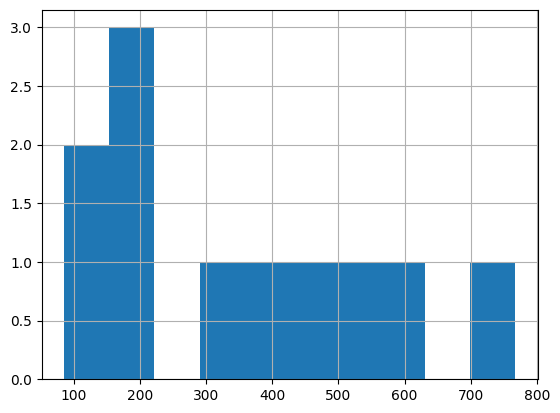

In [34]:
df_reservoirs_metadata["elevation"].hist()

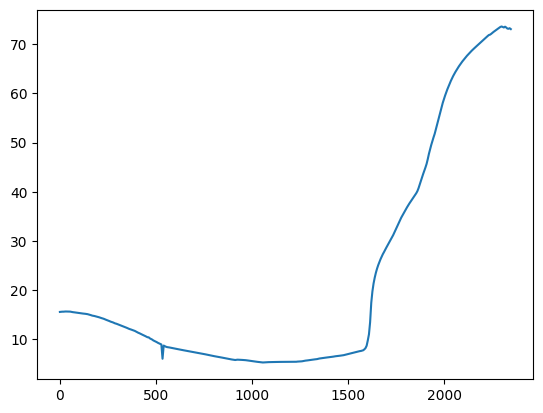

In [35]:
year_rows = df_reservoirs["timestamp"] >= "2025-01-01"
time = df_reservoirs["timestamp"][year_rows].values
time_hours = (time - time[0]) / (3600*1_000_000_000)
sensor = df_reservoirs["CALC000152"][year_rows].values

plt.plot(time_hours, sensor)
plt.show()

In [36]:
columns_to_average = df_reservoirs.columns.difference(["date", "year_month"])
columns_to_average

Index(['CALC000041', 'CALC000046', 'CALC000103', 'CALC000120', 'CALC000125',
       'CALC000143', 'CALC000152', 'CALC000168', 'CALC000713', 'CALC000722',
       'CALC000735', 'timestamp'],
      dtype='object')

In [37]:
df_reservoirs_date = df_reservoirs.groupby("date")[columns_to_average].mean().reset_index(drop=True)
df_reservoirs_date.to_csv("data/aggregated/date/reservoir_sensors_reads.csv", index=False)
df_reservoirs_date

,CALC000041,CALC000046,CALC000103,CALC000120,CALC000125,CALC000143,CALC000152,CALC000168,CALC000713,CALC000722,CALC000735,timestamp
0,71.70435,31.38015,1.75850,12.81500,7.79500,79.57425,19.14110,39.49005,28.17150,27.42475,45.60825,2023-01-12 09:00:00
1,71.71910,31.34700,1.75775,12.74900,7.79100,83.00400,19.13120,39.31590,28.13850,27.40785,45.55810,2023-01-13 09:00:00
2,71.65910,31.33215,1.75560,12.66450,7.78200,85.01955,19.11950,39.17335,28.09875,27.39330,45.51050,2023-01-14 09:00:00
3,51.54400,31.26260,1.75450,12.60350,7.77800,86.26575,19.10015,39.05270,28.06550,27.37585,45.47350,2023-01-15 09:00:00
4,61.75660,31.26755,1.75335,12.51875,7.77240,78.60940,19.08075,38.95145,28.02850,27.35670,45.41800,2023-01-16 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
805,100.56280,64.42100,1.94520,53.49150,24.07100,82.01180,72.04620,43.47840,98.49905,55.80730,77.35025,2025-04-04 09:00:00
806,100.60420,64.61000,1.96575,53.90025,24.20540,82.51555,72.73980,43.48220,98.32675,56.12975,77.62400,2025-04-05 09:00:00
807,100.64565,64.78745,1.98240,54.26515,24.31675,83.36330,73.40080,43.47110,98.10590,56.49950,77.93600,2025-04-06 09:00:00
808,100.50535,64.92250,1.99610,54.51210,24.41500,81.54280,73.45610,43.85570,97.93975,56.85850,78.14805,2025-04-07 09:00:00


In [38]:
df_reservoirs_year_month = df_reservoirs.groupby("year_month")[columns_to_average].mean().reset_index(drop=True)
df_reservoirs_year_month.to_csv("data/aggregated/year_month/reservoir_sensors_reads.csv", index=False)
df_reservoirs_year_month

,CALC000041,CALC000046,CALC000103,CALC000120,CALC000125,CALC000143,CALC000152,CALC000168,CALC000713,CALC000722,CALC000735,timestamp
0,69.242740,31.020740,1.743113,11.975865,7.741010,81.260015,18.784322,38.121727,27.810330,27.261217,45.072522,2023-01-21 21:00:00
1,72.974277,30.769134,1.695251,9.852286,7.648693,79.591452,16.911364,36.118404,26.667475,26.584196,41.833057,2023-02-14 21:00:00
2,75.019031,30.471840,1.667724,8.681379,7.663269,83.195998,9.442632,39.300545,26.012248,26.123382,38.252324,2023-03-16 09:00:00
3,69.594985,29.512448,1.628523,8.175990,7.312838,85.240842,6.706943,39.196693,25.715965,24.890395,32.146200,2023-04-15 21:00:00
4,65.349132,28.270097,1.577852,7.442317,6.915102,83.402438,10.436680,36.312462,25.625640,22.170753,28.896420,2023-05-16 13:48:00
5,59.508257,27.030859,1.615702,6.716006,6.657065,80.566474,26.338296,31.543694,32.087169,24.522265,35.786841,2023-06-16 21:26:40
6,55.929650,23.202926,1.500504,5.751190,6.133518,81.324774,28.475302,29.134479,36.777437,26.132650,39.018461,2023-07-16 09:00:00
7,50.389561,18.756019,1.354281,4.972237,5.376890,82.698285,20.938016,26.211073,33.579258,24.919579,36.879397,2023-08-16 09:00:00
8,50.949309,16.903402,1.347446,4.754737,4.721465,84.200598,19.102531,23.226596,29.673211,23.106009,32.693163,2023-09-15 05:26:40
9,53.232155,15.522926,1.343942,4.383566,4.370329,81.837018,16.920290,21.288215,26.054721,20.905847,26.268134,2023-10-16 09:00:00


<Axes: >

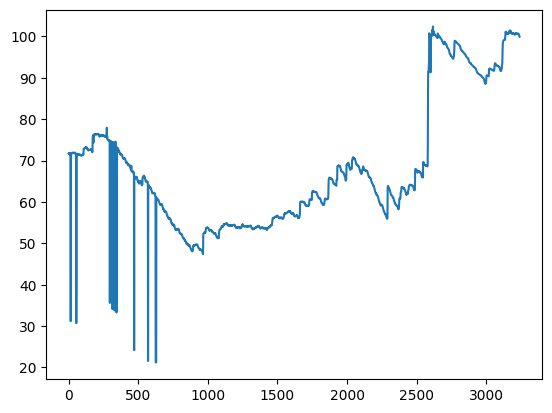

In [39]:
df_reservoirs["CALC000041"].plot()

<Axes: >

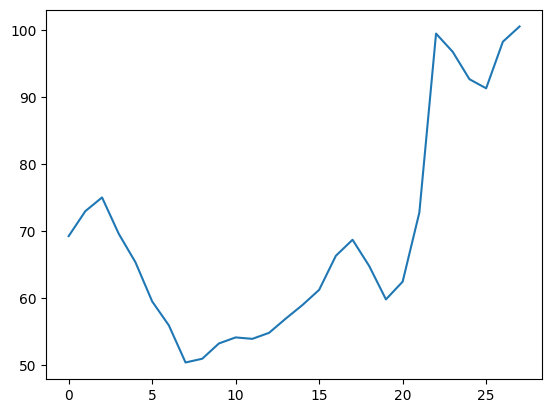

In [40]:
df_reservoirs_year_month["CALC000041"].plot()

# Agreguem la sèrie temporal per estació de l'any

In [41]:
# Define precise season boundaries (astronomical seasons in the northern hemisphere)
def get_season_and_year(timestamp):
    year = timestamp.year
    spring_start = pd.Timestamp(year=year, month=3, day=20)
    summer_start = pd.Timestamp(year=year, month=6, day=21)
    autumn_start = pd.Timestamp(year=year, month=9, day=23)
    winter_start = pd.Timestamp(year=year, month=12, day=21)

    if spring_start <= timestamp < summer_start:
        return f"{year}_Spring"
    elif summer_start <= timestamp < autumn_start:
        return f"{year}_Summer"
    elif autumn_start <= timestamp < winter_start:
        return f"{year}_Autumn"
    else:
        # Winter spans two years
        winter_year = year + 1 if timestamp >= winter_start else year
        return f"{winter_year}_Winter"
# Apply the mapping
df_reservoirs["season_year"] = df_reservoirs["timestamp"].apply(get_season_and_year)

# Select columns to aggregate
columns_to_agg = df_reservoirs.columns.difference(["date", "month_start", "season", "season_year"])

# Group and aggregate
df_reservoirs_seasonal = df_reservoirs.groupby("season_year")[columns_to_agg].agg(func=["min", "mean", "max"]).reset_index()

df_reservoirs_seasonal[["year", "season"]] = df_reservoirs_seasonal["season_year"].str.split("_", expand=True)
df_reservoirs_seasonal["year"] = df_reservoirs_seasonal["year"].astype(int)

# Step 2: Define chronological order for seasons
season_order = {"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3}
df_reservoirs_seasonal["season_order"] = df_reservoirs_seasonal["season"].map(season_order)

# Step 3: Sort by year and season_order
df_reservoirs_seasonal = df_reservoirs_seasonal.sort_values(by=["year", "season_order"]).reset_index(drop=True)

# Optional: Drop helper columns if not needed
df_reservoirs_seasonal = df_reservoirs_seasonal.drop(columns=["year", "year_month", "season", "season_order"])
df_reservoirs_seasonal

/var/folders/q2/zrh3sz712dbc665prw9v99q80000gn/T/ipykernel_30975/4226887423.py:39: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_reservoirs_seasonal = df_reservoirs_seasonal.drop(columns=["year", "year_month", "season", "season_order"])


season_year CALC000041                       CALC000046             \
                      min        mean       max        min       mean   
0  2023_Winter    30.7058   72.747900   76.4598    30.3960  30.801661   
1  2023_Spring    21.5776   67.209069   77.9200    27.1490  28.799505   
2  2023_Summer    21.2030   52.720295   61.3956    16.6840  20.707546   
3  2023_Autumn    51.2138   53.711940   54.7860    13.5188  14.817929   
4  2024_Winter    53.2088   56.134417   60.0746    11.2260  12.030323   
5  2024_Spring    58.9948   64.432107   70.7220    11.3340  16.159575   
6  2024_Summer    55.9734   62.796829   68.9624     1.2960  20.585218   
7  2024_Autumn    62.8126   86.371762  102.3902    16.6710  17.598629   
8  2025_Winter    88.5290   93.578517  101.1500    16.6870  19.331267   
9  2025_Spring    99.8930  100.697862  101.4116    42.7802  60.609002   

           CALC000103                    ... CALC000713 CALC000722             \
       max        min      mean     max  ...        max        min       mean   
0  31.4010     1.6650  1.704594  1.7600  ...     28.185    26.1080  26.671701   
1  30.3960     1.5450  1.613989  1.6654  ...     34.657    21.1690  23.906631   
2  27.1490     1.3326  1.427988  1.6220  ...     37.337    22.6960  25.095310   
3  16.6190     1.3250  1.339689  1.3700  ...     28.845    18.0250  19.903639   
4  13.5060     1.3130  1.321348  1.3654  ...     22.794    15.9200  16.981643   
5  22.9740     1.3100  1.322819  1.3670  ...     50.375    16.3580  22.864937   
6  22.9970     0.7688  1.149488  1.3672  ...     50.980    24.9080  26.694323   
7  18.1050     0.7604  1.038043  1.3134  ...     60.741    23.8580  30.721906   
8  41.0584     0.9762  1.085153  1.2130  ...     80.257     2.6540  35.090732   
9  65.0690     1.0270  1.684443  2.0070  ...     98.542    44.4766  52.601058   

           CALC000735                     timestamp  \
       max        min       mean     max        min   
0  27.4270    38.1340  41.970071  45.636 2023-01-12   
1  26.1580    28.1620  32.200036  38.101 2023-03-20   
2  26.3360    31.4270  37.014593  40.021 2023-06-21   
3  22.6170    25.7550  27.172428  31.103 2023-09-23   
4  18.0080    25.0210  27.303121  28.523 2023-12-21   
5  27.7780    28.5810  32.753035  34.791 2024-03-20   
6  28.0940    31.1610  32.806351  34.881 2024-06-21   
7  35.9660    31.6104  40.439934  49.573 2024-09-23   
8  44.2602    49.6100  53.924164  65.062 2024-12-21   
9  57.4000    65.2420  74.210328  78.425 2025-03-20   

                                                     
                           mean                 max  
0 2023-02-14 09:00:00.000000000 2023-03-19 18:00:00  
1 2023-05-04 05:29:39.775280896 2023-06-20 18:00:00  
2 2023-08-05 22:49:33.913043456 2023-09-21 18:00:00  
3 2023-11-06 19:38:10.909090816 2023-12-20 18:00:00  
4 2024-02-03 20:59:59.999999744 2024-03-19 18:00:00  
5 2024-05-05 06:39:07.826086912 2024-06-20 18:00:00  
6 2024-08-06 21:00:00.000000256 2024-09-22 18:00:00  
7 2024-11-06 09:00:00.000000000 2024-12-20 18:00:00  
8 2025-02-03 09:00:00.000000000 2025-03-19 18:00:00  
9 2025-03-29 21:00:00.000000000 2025-04-08 18:00:00  

[10 rows x 37 columns]

<Axes: >

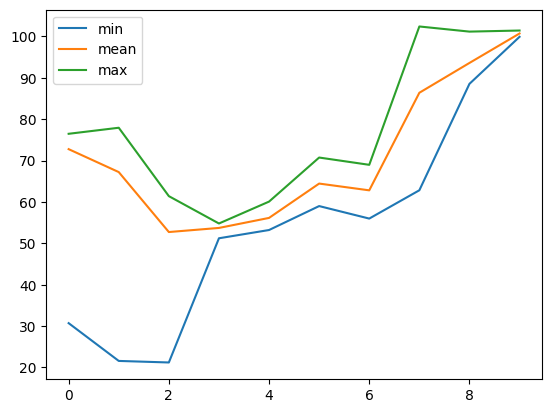

In [42]:
df_reservoirs_seasonal["CALC000041"].plot()

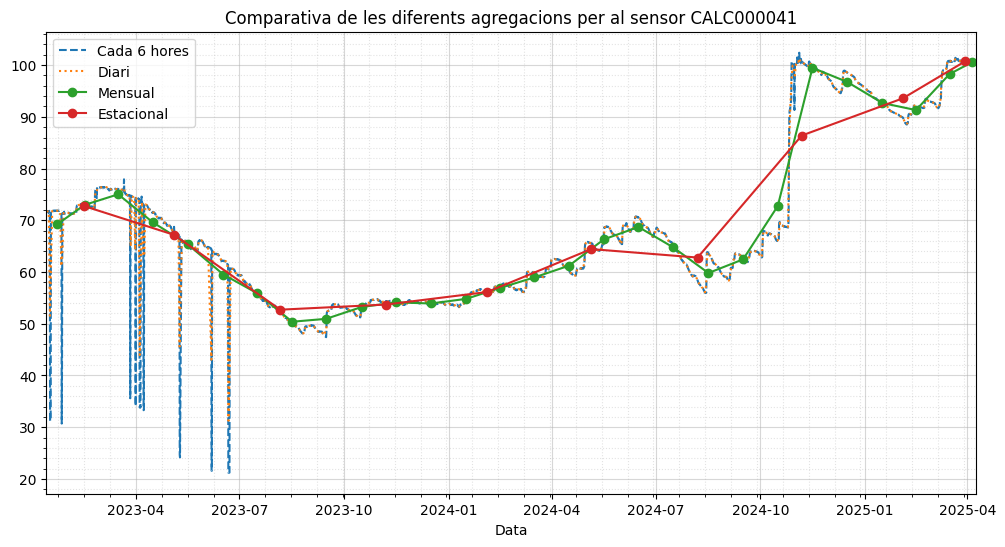

In [43]:
sensor_id = "CALC000041"

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_reservoirs["timestamp"], df_reservoirs[sensor_id], linestyle='--', label="Cada 6 hores")
ax.plot(df_reservoirs_date["timestamp"], df_reservoirs_date[sensor_id], linestyle=':', label="Diari")
ax.plot(df_reservoirs_year_month["timestamp"], df_reservoirs_year_month[sensor_id], marker='o', linestyle='-', label="Mensual")
ax.plot(df_reservoirs_seasonal["timestamp"]["mean"], df_reservoirs_seasonal[sensor_id]["mean"].values, marker='o', linestyle='-', label="Estacional")
ax.set_xlim(df_reservoirs["timestamp"].min(), df_reservoirs["timestamp"].max())
ax.set_xlabel("Data")
ax.legend()
ax.grid(which="major", alpha=0.5)
ax.grid(which="minor", alpha=0.35, linestyle=':')
ax.minorticks_on()
plt.title(f"Comparativa de les diferents agregacions per al sensor {sensor_id}")
plt.savefig("plots/reservoir_sensors_aggregations.png", dpi=300, bbox_inches="tight")
plt.show()

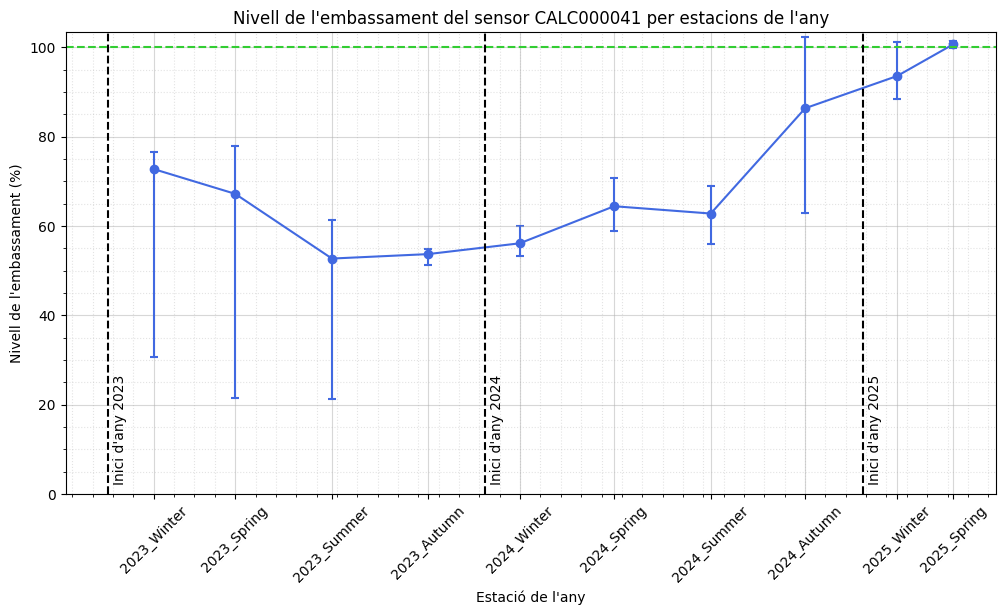

In [44]:
sensor_id = "CALC000041"
colour = "royalblue"
# Create error bar plots with min, mean and max
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df_reservoirs_seasonal["timestamp"]["mean"], df_reservoirs_seasonal[sensor_id]["min"], marker='_', linestyle='-', label="Estacional", c=colour)
ax.scatter(df_reservoirs_seasonal["timestamp"]["mean"], df_reservoirs_seasonal[sensor_id]["max"], marker='_', linestyle='-', label="Estacional", c=colour)

for i in range(len(df_reservoirs_seasonal)):
    timestamp = df_reservoirs_seasonal["timestamp"]["mean"][i]
    plt.plot([timestamp, timestamp], [df_reservoirs_seasonal[sensor_id]["min"][i], df_reservoirs_seasonal[sensor_id]["max"][i]], c=colour)

ax.plot(df_reservoirs_seasonal["timestamp"]["mean"], df_reservoirs_seasonal[sensor_id]["mean"], marker='o', linestyle='-', label="Estacional", c=colour)
ax.axhline(100, color="limegreen", linestyle="--")

ax.set_ylim(0, 1.01*max(100, df_reservoirs_seasonal[sensor_id]["max"].max()))
y_lims = ax.get_ylim()

# Plot vertical lines on the 1st of January of each year
for year in [2023, 2024, 2025]:
    year_change = pd.Timestamp(year=year, month=1, day=1)
    ax.axvline(x=year_change, color="k", linestyle="--")
    
    ax.text(year_change + pd.Timedelta(days=5), y_lims[0] + (y_lims[1] - y_lims[0]) / 50, f"Inici d'any {year}", rotation=90, color="k", va="bottom")

ax.set_xticks(df_reservoirs_seasonal["timestamp"]["mean"])
ax.set_xticklabels(df_reservoirs_seasonal["season_year"], rotation=45)
ax.grid(which="major", alpha=0.5)
ax.grid(which="minor", alpha=0.35, linestyle=':')
ax.minorticks_on()
plt.title(f"Nivell de l'embassament del sensor {sensor_id} per estacions de l'any")
plt.xlabel("Estació de l'any")
plt.ylabel("Nivell de l'embassament (%)")
plt.savefig("plots/reservoir_sensors_seasonal.png", dpi=300, bbox_inches="tight")
plt.show()

### Aggregate by 